In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import create_engine, func, inspect, column
import datetime as dt

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#TO DO MY CODE HERE
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
#TO DO MY CODE HERE
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
#TO DO MY CODE HERE
## Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [8]:
#TO DO MY CODE HERE
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1df8514ae00>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08}

In [10]:
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1df851f5cc0>,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0}

In [11]:
inspector = inspect(engine)
tables = inspector.get_table_names()
for table_name in tables:
    print(f"Table: {table_name}")

columns = inspector.get_columns(table_name)
for column in columns:
        print(f"Column: {column['name']} - Type: {column['type']}")

Table: measurement
Table: station
Column: id - Type: INTEGER
Column: station - Type: TEXT
Column: name - Type: TEXT
Column: latitude - Type: FLOAT
Column: longitude - Type: FLOAT
Column: elevation - Type: FLOAT


#Exploratory Precipitation Analysis

In [12]:
#TO DO MY CODE HERE
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23',)

In [13]:
import datetime
from datetime import timedelta

#TO DO MY CODE HERE
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
last_12_months = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date <= '2017-08-23', measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()

# Calculate the date one year from the last date in data set.
last_date = session.query(func.max(measurement.date)).scalar()
one_year_ago = datetime.datetime.strptime(last_date, '%Y-%m-%d') - datetime.timedelta(days=365) #stackoverflow https://stackoverflow.com/questions/19480028/attributeerror-datetime-module-has-no-attribute-strptime

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column name
df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipation Data'])
print(df)

# Sort the dataframe by date
df = df.sort_values(by='Date')

print(df.head())

            Date  Precipation Data
0     2016-08-24              0.08
1     2016-08-25              0.08
2     2016-08-26              0.00
3     2016-08-27              0.00
4     2016-08-28              0.01
...          ...               ...
2218  2017-08-19              0.09
2219  2017-08-20               NaN
2220  2017-08-21              0.56
2221  2017-08-22              0.50
2222  2017-08-23              0.45

[2223 rows x 2 columns]
            Date  Precipation Data
0     2016-08-24              0.08
1006  2016-08-24               NaN
1524  2016-08-24              2.15
702   2016-08-24              2.28
360   2016-08-24              2.15


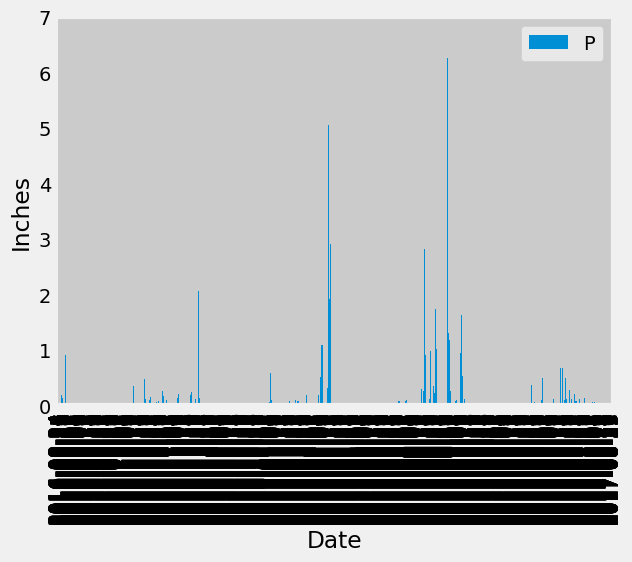

In [29]:
#TO DO MY CODE HERE
# Use Pandas Plotting with Matplotlib to plot the data
graph = df.plot(x='Date', y='Precipation Data', kind='bar')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend('Precipitation')
plt.ylim(0, 7)
plt.xticks(rotation=90)
plt.show()

In [14]:
#TO DO MY CODE HERE
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['Precipation Data'].describe()
summary_stats

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipation Data, dtype: float64

Exploratory Station Analysis

In [15]:
#TO DO MY CODE HERE
# Design a query to calculate the total number of stations in the dataset
all_stations = session.query(func.count(station.id)).scalar()
print(f"Total number of stations is {all_stations}")

Total number of stations is 9


In [16]:
#TO DO MY CODE HERE (ChatGPT, personal communication, February 27, 2024)
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station).label('row_count')).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

# Print the query result
for station_id, row_count in active_stations:
    station_name = session.query(station.name).filter(station.station == station_id).first()[0]
    print(f"Station: {station_name}, Row Count: {row_count}")

Station: WAIHEE 837.5, HI US, Row Count: 2772
Station: WAIKIKI 717.2, HI US, Row Count: 2724
Station: KANEOHE 838.1, HI US, Row Count: 2709
Station: WAIMANALO EXPERIMENTAL FARM, HI US, Row Count: 2669
Station: MANOA LYON ARBO 785.2, HI US, Row Count: 2612
Station: KUALOA RANCH HEADQUARTERS 886.9, HI US, Row Count: 2202
Station: HONOLULU OBSERVATORY 702.2, HI US, Row Count: 1979
Station: PEARL CITY, HI US, Row Count: 1372
Station: UPPER WAHIAWA 874.3, HI US, Row Count: 511


In [17]:
#TO DO MY CODE HERE
#Which station id has the greatest number of observations? (ChatGPT, personal communication, February 27, 2024)
active_stations = session.query(measurement.station, func.count(measurement.station).label('row_count')).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()

most_observations = active_stations[0]
observation_count = active_stations[1]

# Print the query result
print(f"Station with the most observations: {most_observations}, Observation count: {observation_count}")


Station with the most observations: USC00519281, Observation count: 2772


In [18]:
#Design a query that calculates the lowest, highest, and average temperatures that filters on the most-active station id found in the previous query.
temp_variation = session.query(measuerment.station).filter(measurement.station == 'USC00519281').all()

NameError: name 'measuerment' is not defined

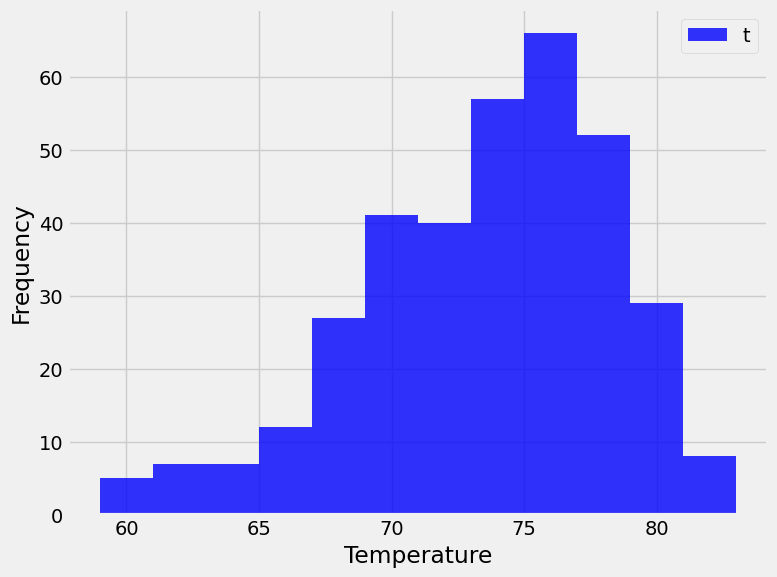

In [19]:
#Design a query to get the previous 12 months of temperature observation (TOBS) data. To do so, complete the following steps:
# Calculate the date one year from the last date in data set.

last_date = session.query(func.max(measurement.date)).scalar()
one_year_ago = datetime.datetime.strptime(last_date, '%Y-%m-%d') - datetime.timedelta(days=365) #stackoverflow https://stackoverflow.com/questions/19480028/attributeerror-datetime-module-has-no-attribute-strptime

#Query the previous 12 months of TOBS data for that station. Comes from measurement table. (ChatGPT, personal communication, February 27, 2024)

months_tobs = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= one_year_ago).\
    filter(measurement.date <= last_date).all()
#for date, tobs in months_tobs:
    #print(f"Date:{date}, TOBS: {tobs}")

#Plot the results as a histogram with bins=12
variable = [tobs for date, tobs in months_tobs]
plt.figure(figsize=(8, 6))
plt.hist(variable, bins=12, color='blue', alpha=0.8)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend('tobs')
plt.tight_layout()
plt.show()

In [127]:
#TO DO MY CODE HERE
#Close session
session.close()